# Lab 2
#### Simon Jasansky


## Assignment 1.1

In [116]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# import data
exp1 = list()
exp1.append(pd.read_csv("data/exp1a.csv"))
exp1.append(pd.read_csv("data/exp1b.csv"))
exp1.append(pd.read_csv("data/exp1c.csv"))

exp2 = list()
exp2.append(pd.read_csv("data/exp2a.csv"))
exp2.append(pd.read_csv("data/exp2b.csv"))

exp3 = list()
exp3.append(pd.read_csv("data/exp3a.csv"))
exp3.append(pd.read_csv("data/exp3b.csv"))
exp3.append(pd.read_csv("data/exp3c.csv"))
exp3.append(pd.read_csv("data/exp3d.csv"))

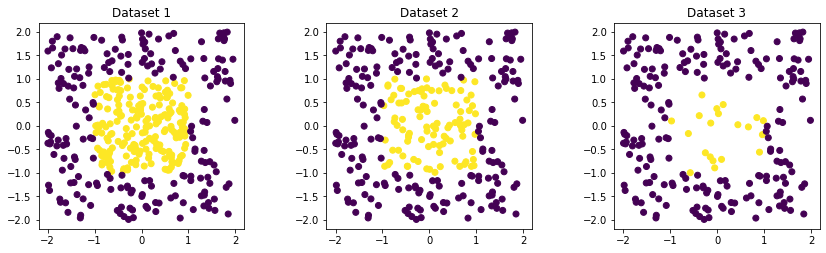

In [117]:
# plot the data
fig = plt.figure(figsize= (14,14))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i in range(0, len(exp1)):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(exp1[i]["x"], exp1[i]["y"],
               c = exp1[i]["class"])
    ax.set_title("Dataset " + str(i+1))
    ax.set(adjustable="box", aspect="equal")

In [118]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import copy

# custom function for knn with 10-fold Cross-Validation
def custom_knn(datasets, weights):
    accuracy_l = list()
    conf_mat_l = list()

    for i in range(0, len(datasets)):
        X_names = [x for x in datasets[i].columns if x != "class"]
        X = np.array(datasets[i][X_names])
        Y = np.array(datasets[i]["class"])

        accuracy_temp = list()
        conf_mat_temp = list()

        for k in [1,5,11,21]:
            classification_method = KNeighborsClassifier(n_neighbors = k, weights=weights)
            Y_pred = cross_val_predict(classification_method, X, Y, cv = 10)
            conf_mat = confusion_matrix(Y, Y_pred)
            accuracy = accuracy_score(Y, Y_pred)
            accuracy_temp.append(accuracy)
            conf_mat_temp.append(conf_mat)
        accuracy_l.append(np.around(np.array(accuracy_temp), 3)) # round accuracy rates
        conf_mat_l.append(conf_mat_temp)

    #construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] * len(datasets)
    ds_nr = range(1,(len(datasets)+1))
    col_names = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]

    # build accuracy table
    accuracy_df = pd.DataFrame(data = accuracy_l,
                               columns = ["k = 1", "k = 5", "k = 11", "k = 21"],
                               index = col_names)

    # build the confusion matrix table
    conf_mat_df = pd.DataFrame(data = conf_mat_l,
                               columns = ["k = 1", "k = 5", "k = 11", "k = 21"],
                               index = col_names)
    return(accuracy_df.transpose(), conf_mat_df.transpose())

In [119]:
import matplotlib.gridspec as gridspec

# custom function to plot the confusion matrix
def custom_confusion_matrix_knn(conf_df, x_dim, y_dim):
    fig = plt.figure(figsize=(7, 7))
    outer = gridspec.GridSpec(y_dim, x_dim, wspace=0.2, hspace=0.2)
    fig.suptitle("Confusion matrices", size = "20")

    x_outer = list()
    for x in range(y_dim):
        x_outer.append([x]*x_dim)
    x_outer = list(np.concatenate(x_outer).flat)
    y_outer = list(range(x_dim)) * y_dim

    x_inner = [0,0,1,1]
    y_inner = [0,1,0,1]

    #construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] * x_dim
    ds_nr = range(1, x_dim + 1)
    sub_titles_x = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]
    sub_titles_y = ["k = 1", "k = 5", "k = 11", "k = 21"]
    k_count = 0

    for i in range(x_dim * y_dim):
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                 subplot_spec=outer[i],
                                                 wspace=0, hspace=0)
        if i in list(range(0, x_dim)):
            ax1 = plt.Subplot(fig, outer[i])
            ax1.set_title(sub_titles_x[i], size = 12)
            ax1.set_xticks([])
            ax1.set_yticks([])
            fig.add_subplot(ax1)

        if i in list(range(0, 12, x_dim)):
            ax2 = plt.Subplot(fig, outer[i])
            ax2.text(-0.15, 0.4, sub_titles_y[k_count],
                     rotation = 90, size = 12)
            ax2.set_xticks([])
            ax2.set_yticks([])
            fig.add_subplot(ax2)
            k_count += 1

        for j in range(4):
            ax = plt.Subplot(fig, inner[j])
            t = ax.text(0.5,0.35,
                        conf_df.iat[x_outer[i], y_outer[i]][x_inner[j], y_inner[j]],
                        size = 15)
            t.set_ha('center')
            ax.set_xticks([])
            ax.set_yticks([])
            if x_inner[j] == 0 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "TP:", size = 10)
            if x_inner[j] == 0 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "FP:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "FN:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "TN:", size = 10)
            fig.add_subplot(ax)
    return(fig)

        Dataset 1  Dataset 2  Dataset 3
k = 1       0.978      0.960      0.941
k = 5       0.952      0.967      0.977
k = 11      0.942      0.947      0.945
k = 21      0.928      0.940      0.936


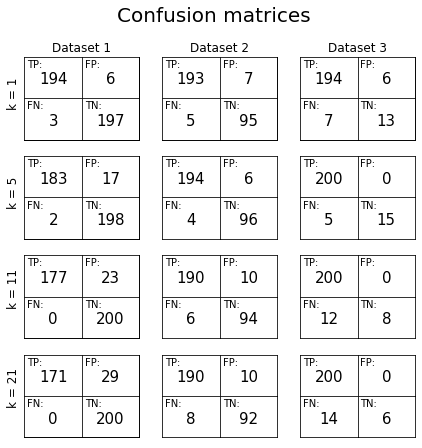

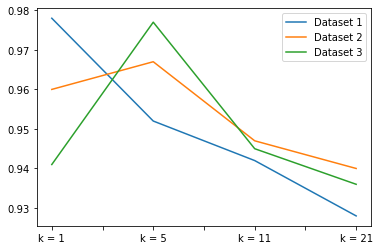

In [120]:
output = custom_knn(exp1, "uniform")
accuracy_df_knn_uniform = output[0]
conf_mat_df_knn_uniform = output[1]

print(accuracy_df_knn_uniform)
custom_confusion_matrix_knn(conf_mat_df_knn_uniform, 3, 4)
plt.show()

accuracy_df_knn_uniform.plot()
plt.show()

(b) and (c)
Explain what is going on in the accuracy and confusion matrix

        Dataset 1  Dataset 2  Dataset 3
k = 1       0.978      0.960      0.941
k = 5       0.968      0.970      0.977
k = 11      0.962      0.960      0.968
k = 21      0.948      0.963      0.968


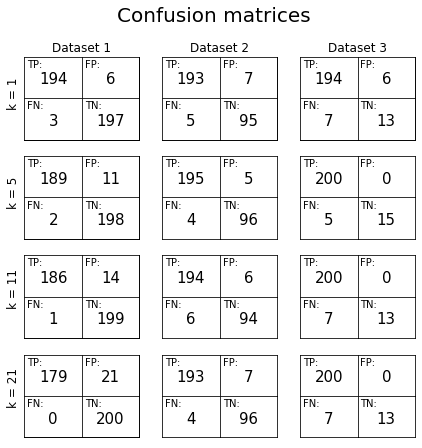

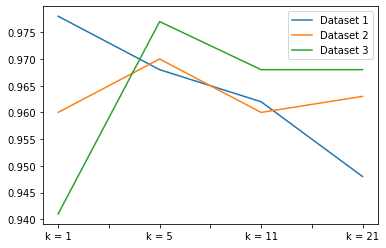

In [121]:
# (d)
# do knn with 10-fold Cross-Validation
output = custom_knn(exp1, "distance")
accuracy_df_knn_distance = output[0]
conf_mat_df_knn_distance = output[1]

print(accuracy_df_knn_distance)
custom_confusion_matrix_knn(conf_mat_df_knn_distance, 3, 4)
plt.show()

accuracy_df_knn_distance.plot()
plt.show()

In [122]:
# (e)
def custom_classification(datasets, method):
    accuracy_l = list()
    conf_mat_l = list()
    predicted_l = list()

    for i in range(0, len(datasets)):
        X_names = [x for x in datasets[i].columns if x != "class"]
        X = np.array(datasets[i][X_names])
        Y = np.array(datasets[i]["class"])

        if method == "log_reg":
            class_method = LogisticRegression()
        if method == "dec_tree":
            class_method = DecisionTreeClassifier()
        if method == "gauss_NB":
            class_method = GaussianNB()
        if method == "SVM":
            class_method = SVC()
        Y_pred = cross_val_predict(class_method, X, Y, cv = 10)
        conf_mat = confusion_matrix(Y, Y_pred)
        accuracy = accuracy_score(Y, Y_pred)

        accuracy_l.append(np.around(np.array([accuracy]), 3)) # round accuracy rates
        conf_mat_l.append([conf_mat])

        predicted_temp = copy.copy(datasets[i])
        predicted_temp["predicted_class"] = Y_pred
        predicted_temp = predicted_temp.assign(
            correct_prediction = lambda x: x["class"] == x["predicted_class"]
            )
        predicted_l.append(predicted_temp)

    # construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] * len(datasets)
    ds_nr = range(1,(len(datasets)+1))
    col_names = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]

    # build accuracy table
    accuracy_df = pd.DataFrame(data = accuracy_l,
                               columns = [method],
                               index = col_names)

    # build the confusion matrix table
    conf_mat_df = pd.DataFrame(data = conf_mat_l,
                               columns = [method],
                               index = col_names)

    return accuracy_df.transpose(), conf_mat_df.transpose(), predicted_l

In [123]:
# custom function to plot the confusion matrix
def custom_confusion_matrix(conf_df):
    fig = plt.figure(figsize=(conf_df.shape[1] * 2.5, 2))
    outer = gridspec.GridSpec(1, conf_df.shape[1], wspace=0.2, hspace=0.2)
    fig.suptitle("Confusion matrices", size = "20", y = 1.3)

    x_inner = [0,0,1,1]
    y_inner = [0,1,0,1]

    # construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] *  conf_df.shape[1]
    ds_nr = range(1,( conf_df.shape[1]+1))
    col_names = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]

    for i in range(conf_df.shape[1]):
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                 subplot_spec=outer[i],
                                                 wspace=0, hspace=0)

        ax1 = plt.Subplot(fig, outer[i])
        ax1.set_title(col_names[i], size = 12)
        ax1.set_xticks([])
        ax1.set_yticks([])
        fig.add_subplot(ax1)

        for j in range(4):
            ax = plt.Subplot(fig, inner[j])
            t = ax.text(0.5,0.35,
                        conf_df.iat[0, i][x_inner[j], y_inner[j]],
                        size = 15)
            t.set_ha('center')
            ax.set_xticks([])
            ax.set_yticks([])
            if x_inner[j] == 0 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "TP:", size = 10)
            if x_inner[j] == 0 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "FP:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "FN:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "TN:", size = 10)
            fig.add_subplot(ax)
    return fig

          Dataset 1  Dataset 2  Dataset 3
dec_tree      0.995      0.983      0.982


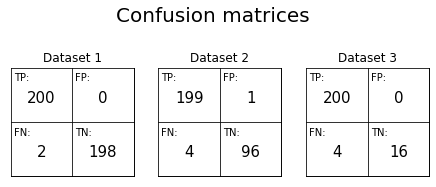

In [124]:
# decision trees
output = custom_classification(exp1, "dec_tree")
accuracy_df_dec_tree = output[0]
conf_mat_df_dec_tree = output[1]

print(accuracy_df_dec_tree)
custom_confusion_matrix(conf_mat_df_dec_tree)
plt.show()

         Dataset 1  Dataset 2  Dataset 3
log_reg      0.522      0.667      0.909


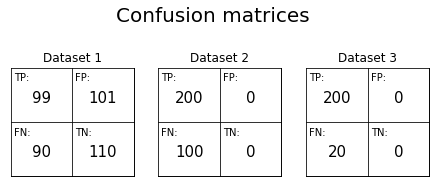

In [125]:
# logistic regression
output = custom_classification(exp1, "log_reg")
accuracy_df_log_reg = output[0]
conf_mat_df_log_reg = output[1]

print(accuracy_df_log_reg)
custom_confusion_matrix(conf_mat_df_log_reg)
plt.show()

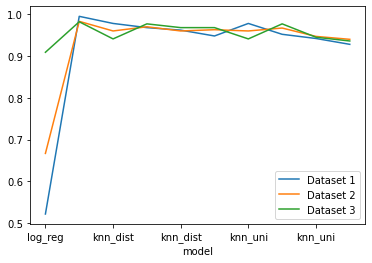

          Dataset 1  Dataset 2  Dataset 3     model
log_reg       0.522      0.667      0.909   log_reg
dec_tree      0.995      0.983      0.982  dec_tree
k = 1         0.978      0.960      0.941  knn_dist
k = 5         0.968      0.970      0.977  knn_dist
k = 11        0.962      0.960      0.968  knn_dist
k = 21        0.948      0.963      0.968  knn_dist
k = 1         0.978      0.960      0.941   knn_uni
k = 5         0.952      0.967      0.977   knn_uni
k = 11        0.942      0.947      0.945   knn_uni
k = 21        0.928      0.940      0.936   knn_uni


In [126]:
# create dataframe comparing accuracy rates and plot it
accuracy_df_dec_tree["model"] = ["dec_tree"]
accuracy_df_log_reg["model"] = ["log_reg"]
accuracy_df_knn_distance["model"] = ["knn_dist"] * len(accuracy_df_knn_distance)
accuracy_df_knn_uniform["model"] = ["knn_uni"] * len(accuracy_df_knn_uniform)

accuracy_rates = pd.concat([accuracy_df_log_reg, accuracy_df_dec_tree,
                            accuracy_df_knn_distance, accuracy_df_knn_uniform])

accuracy_rates.plot(x = "model")
plt.show()
print(accuracy_rates)

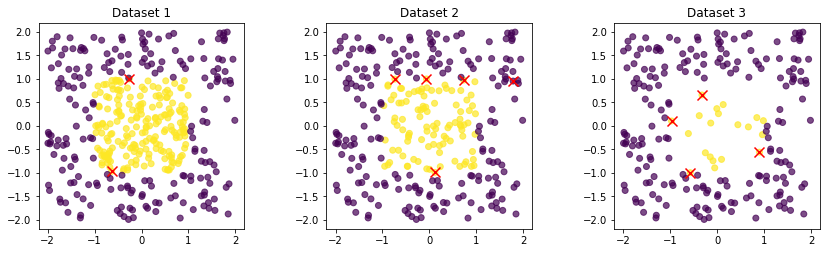

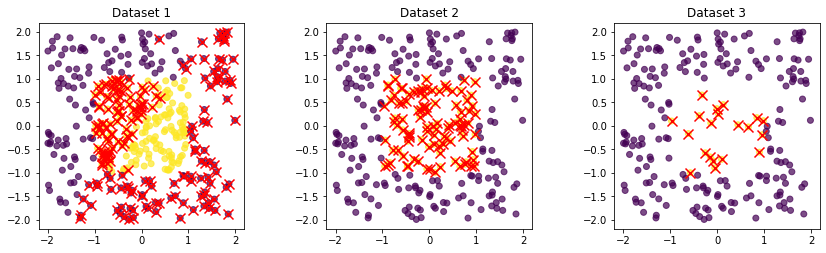

In [127]:
# visualize the errors of dec_tree and log_reg
def prediction_error_plot(data):
    fig = plt.figure(figsize= (14,14))
    fig.subplots_adjust(hspace=0.5, wspace=0.4)

    for i in range(0, len(exp1)):
        ax = fig.add_subplot(1, 3, i+1)
        ax.scatter(data[i]["x"], data[i]["y"],
                   c = data[i]["class"],
                   alpha = 0.7)
        ax.scatter(data[i][data[i]["correct_prediction"] == False]["x"],
                   data[i][data[i]["correct_prediction"] == False]["y"],
                   s = 100,
                   c = "red",
                   marker = "x")
        ax.set_title("Dataset " + str(i+1))
        ax.set(adjustable="box", aspect="equal")
    plt.show()


prediction_error_plot(custom_classification(exp1, "dec_tree")[2])
prediction_error_plot(custom_classification(exp1, "log_reg")[2])


## Assignment 1.2

        Dataset 1  Dataset 2
k = 1         1.0      0.569
k = 5         1.0      0.515
k = 11        1.0      0.510
k = 21        1.0      0.490


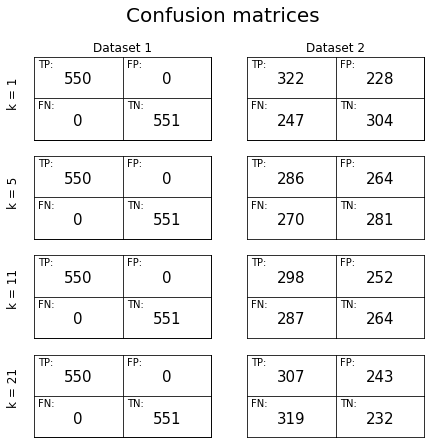

In [128]:
# Nearest neighbor
output = custom_knn(exp2, "uniform")
accuracy_df_knn = output[0]
conf_mat_df_knn = output[1]

print(accuracy_df_knn)
custom_confusion_matrix_knn(conf_mat_df_knn, 2, 4)
plt.show()

          Dataset 1  Dataset 2
dec_tree        1.0      0.741


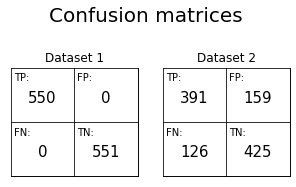

In [129]:
# Decision trees
output = custom_classification(exp2, "dec_tree")
accuracy_df_dec_tree = output[0]
conf_mat_df_dec_tree = output[1]

print(accuracy_df_dec_tree)
custom_confusion_matrix(conf_mat_df_dec_tree)
plt.show()

          Dataset 1  Dataset 2
gauss_NB      0.446      0.363


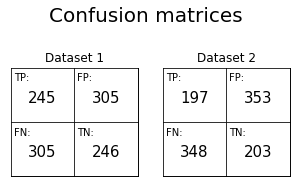

In [130]:
# Naive Bayes
output = custom_classification(exp2, "gauss_NB")
accuracy_df_NB = output[0]
conf_mat_df_NB = output[1]

print(accuracy_df_NB)
custom_confusion_matrix(conf_mat_df_NB)

plt.show()

C:\Users\sjasa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sjasa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

         Dataset 1  Dataset 2
log_reg      0.446      0.428


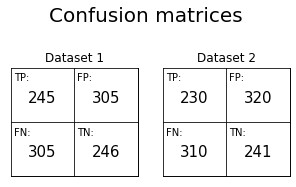

In [131]:
# Logistic Regression
output = custom_classification(exp2, "log_reg")
accuracy_df_log_reg = output[0]
conf_mat_df_log_reg = output[1]

print(accuracy_df_log_reg)
custom_confusion_matrix(conf_mat_df_log_reg)
plt.show()

     Dataset 1  Dataset 2
SVM        1.0      0.567


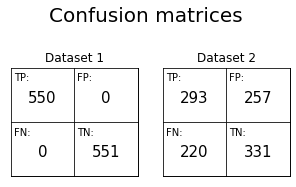

In [132]:
# SVMs
output = custom_classification(exp2, "SVM")
accuracy_df_SVM = output[0]
conf_mat_df_SVM = output[1]

print(accuracy_df_SVM)
custom_confusion_matrix(conf_mat_df_SVM)
plt.show()

## Assignment 1.3

        Dataset 1  Dataset 2  Dataset 3  Dataset 4
k = 1       0.988      0.808      0.730      0.634
k = 5       0.983      0.855      0.799      0.715
k = 11      0.984      0.886      0.826      0.759
k = 21      0.977      0.892      0.850      0.796


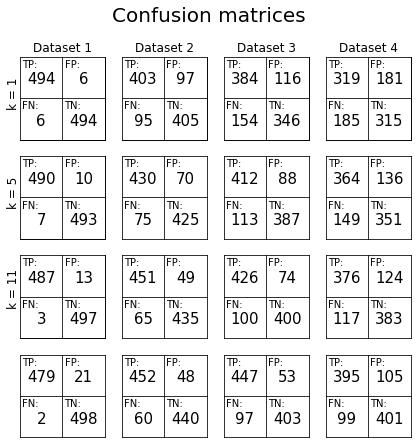

In [133]:
# Nearest neighbor
output = custom_knn(exp3, "uniform")
accuracy_df_knn = output[0]
conf_mat_df_knn = output[1]

print(accuracy_df_knn)
custom_confusion_matrix_knn(conf_mat_df_knn, 4, 4)
plt.show()

          Dataset 1  Dataset 2  Dataset 3  Dataset 4
dec_tree      0.973      0.724      0.639      0.562


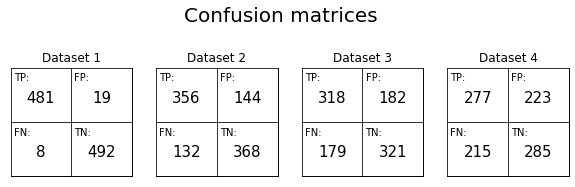

In [134]:
# Decision trees
output = custom_classification(exp3, "dec_tree")
accuracy_df_dec_tree = output[0]
conf_mat_df_dec_tree = output[1]

print(accuracy_df_dec_tree)
custom_confusion_matrix(conf_mat_df_dec_tree)
plt.show()

          Dataset 1  Dataset 2  Dataset 3  Dataset 4
gauss_NB      0.959      0.959      0.922       0.89


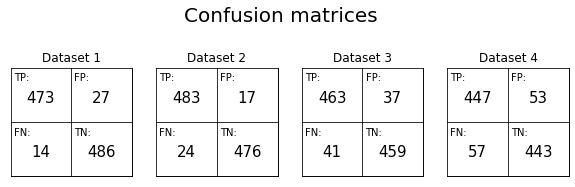

In [135]:
# Naive Bayes
output = custom_classification(exp3, "gauss_NB")
accuracy_df_NB = output[0]
conf_mat_df_NB = output[1]

print(accuracy_df_NB)
custom_confusion_matrix(conf_mat_df_NB)

plt.show()

         Dataset 1  Dataset 2  Dataset 3  Dataset 4
log_reg      0.988      0.974      0.971      0.944


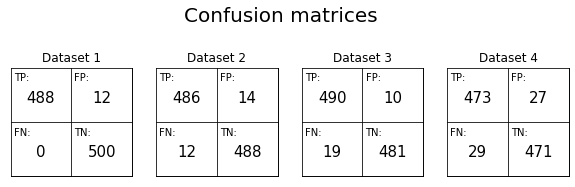

In [136]:
# Logistic Regression
output = custom_classification(exp3, "log_reg")
accuracy_df_log_reg = output[0]
conf_mat_df_log_reg = output[1]

print(accuracy_df_log_reg)
custom_confusion_matrix(conf_mat_df_log_reg)
plt.show()

     Dataset 1  Dataset 2  Dataset 3  Dataset 4
SVM      0.988      0.952      0.944      0.916


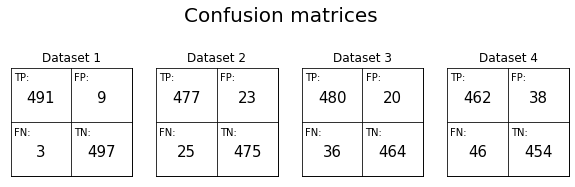

In [137]:
# SVMs
output = custom_classification(exp3, "SVM")
accuracy_df_SVM = output[0]
conf_mat_df_SVM = output[1]

print(accuracy_df_SVM)
custom_confusion_matrix(conf_mat_df_SVM)
plt.show()